In [10]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re
import gensim
from gensim.models import Word2Vec

In [11]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
sample_text = """
Machine learning is a field of computer science that gives computers the ability to learn without being explicitly programmed.
It focuses on the development of algorithms that can analyze and interpret patterns in data.
Machine learning is used in a variety of applications such as email filtering, speech recognition, and computer vision.
The algorithms improve their performance as they are exposed to more data over time.
Learning from data enables machines to make predictions and decisions based on past experiences.
"""

In [7]:
sentences = re.sub('[^A-Za-z]+', ' ', sample_text)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
sentences = sentences.lower()
sentences

'machine learning is field of computer science that gives computers the ability to learn without being explicitly programmed it focuses on the development of algorithms that can analyze and interpret patterns in data machine learning is used in variety of applications such as email filtering speech recognition and computer vision the algorithms improve their performance as they are exposed to more data over time learning from data enables machines to make predictions and decisions based on past experiences'

In [8]:
all_sentences = sent_tokenize(sentences)
print(all_sentences)
all_words = [word_tokenize(sent) for sent in all_sentences]
print(all_words)

['machine learning is field of computer science that gives computers the ability to learn without being explicitly programmed it focuses on the development of algorithms that can analyze and interpret patterns in data machine learning is used in variety of applications such as email filtering speech recognition and computer vision the algorithms improve their performance as they are exposed to more data over time learning from data enables machines to make predictions and decisions based on past experiences']
[['machine', 'learning', 'is', 'field', 'of', 'computer', 'science', 'that', 'gives', 'computers', 'the', 'ability', 'to', 'learn', 'without', 'being', 'explicitly', 'programmed', 'it', 'focuses', 'on', 'the', 'development', 'of', 'algorithms', 'that', 'can', 'analyze', 'and', 'interpret', 'patterns', 'in', 'data', 'machine', 'learning', 'is', 'used', 'in', 'variety', 'of', 'applications', 'such', 'as', 'email', 'filtering', 'speech', 'recognition', 'and', 'computer', 'vision', 't

In [6]:
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

data = all_words
data1 = data[0]
data1

['machine',
 'learning',
 'field',
 'computer',
 'science',
 'gives',
 'computers',
 'ability',
 'learn',
 'without',
 'explicitly',
 'programmed',
 'focuses',
 'development',
 'algorithms',
 'analyze',
 'interpret',
 'patterns',
 'data',
 'machine',
 'learning',
 'used',
 'variety',
 'applications',
 'email',
 'filtering',
 'speech',
 'recognition',
 'computer',
 'vision',
 'algorithms',
 'improve',
 'performance',
 'exposed',
 'data',
 'time',
 'learning',
 'data',
 'enables',
 'machines',
 'make',
 'predictions',
 'decisions',
 'based',
 'past',
 'experiences']

In [12]:
model = Word2Vec(sentences=data, vector_size=50, window=3, min_count=1, sg=0)
model


In [13]:
word = 'machine'
print(f"\nMost similar words to '{word}':")
similar_words = model.wv.most_similar(word)
for sim_word, score in similar_words:
    print(f"{sim_word}: {score:.4f}")


Most similar words to 'machine':
email: 0.2508
filtering: 0.2484
patterns: 0.1965
algorithms: 0.1660
learn: 0.1552
gives: 0.1440
decisions: 0.1439
machines: 0.1436
development: 0.1397
improve: 0.1296


In [16]:
word = input("Enter a word: ")
word = word.lower().strip()
print(f"\nMost similar words to '{word}':")
similar_words = model.wv.most_similar(word)
for sim_word, score in similar_words:
    print(f"{sim_word}: {score:.4f}")


Most similar words to 'machine':
email: 0.2508
filtering: 0.2484
patterns: 0.1965
algorithms: 0.1660
learn: 0.1552
gives: 0.1440
decisions: 0.1439
machines: 0.1436
development: 0.1397
improve: 0.1296


In [17]:
model.wv.index_to_key

['learning',
 'data',
 'machine',
 'computer',
 'algorithms',
 'explicitly',
 'interpret',
 'analyze',
 'development',
 'focuses',
 'programmed',
 'learn',
 'without',
 'ability',
 'computers',
 'gives',
 'science',
 'field',
 'patterns',
 'experiences',
 'past',
 'exposed',
 'based',
 'decisions',
 'predictions',
 'make',
 'machines',
 'enables',
 'time',
 'performance',
 'variety',
 'improve',
 'vision',
 'recognition',
 'speech',
 'filtering',
 'email',
 'applications',
 'used']

In [18]:
model.wv.vectors

array([[-0.00107245,  0.00047286,  0.0102067 , ...,  0.01922949,
         0.00996412,  0.01846629],
       [-0.01636386,  0.00899326, -0.00829835, ..., -0.01409672,
         0.00183256,  0.01278303],
       [-0.01723938,  0.00733148,  0.01037977, ..., -0.00309133,
         0.00302193,  0.00358008],
       ...,
       [ 0.0194711 , -0.01956077, -0.01299898, ...,  0.00047299,
         0.01892352, -0.00521968],
       [-0.01037544, -0.01479442, -0.00582388, ..., -0.00540243,
         0.00764954,  0.00067525],
       [ 0.01123652,  0.01100369,  0.00365   , ..., -0.01757141,
         0.00687242,  0.00418452]], dtype=float32)

In [19]:
all_words = model.wv.index_to_key

for word in all_words:
    vector = model.wv[word]
    print(word, vector)

learning [-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]
data [-0.01636386  0.00899326 -0.00829835  0.00167455  0.01699228 -0.00894694
  0.00902528 -0.01356233 -0.00712085  0.01881327 -0.00316969  0.00062187
 -0.00830405 -0.01535722 -0.00304042  0.0049426  -0.00180093  0.01107951
 -0

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [21]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
result

array([[ 1.05281044e-02,  1.63744483e-02],
       [ 3.21405977e-02, -1.79702789e-02],
       [-1.33226486e-02, -2.53652316e-02],
       [-3.38906348e-02,  7.79991597e-03],
       [ 3.63492686e-03, -1.01243909e-02],
       [ 3.26409638e-02,  6.34051906e-03],
       [-4.68449527e-03,  2.91838665e-02],
       [-2.68996879e-02,  1.17014870e-02],
       [-2.99080592e-02, -3.94943617e-02],
       [ 9.80480667e-03,  2.61590816e-02],
       [-2.25746762e-02,  4.01277421e-03],
       [ 1.98970977e-02,  2.10726280e-02],
       [ 9.90463421e-04, -3.40010319e-03],
       [ 3.12869437e-02,  1.04557360e-02],
       [ 1.68443304e-02,  2.80872788e-02],
       [-3.19519034e-03, -3.80745269e-02],
       [ 1.69451460e-02, -2.40419386e-03],
       [ 1.48199853e-02,  1.13396300e-02],
       [ 1.90461148e-02, -9.57066379e-03],
       [ 2.78346650e-02,  1.24734556e-02],
       [-1.63443014e-02,  3.45418341e-02],
       [ 1.55425295e-02, -3.83506082e-02],
       [-1.87333915e-02,  4.24399935e-02],
       [ 1.

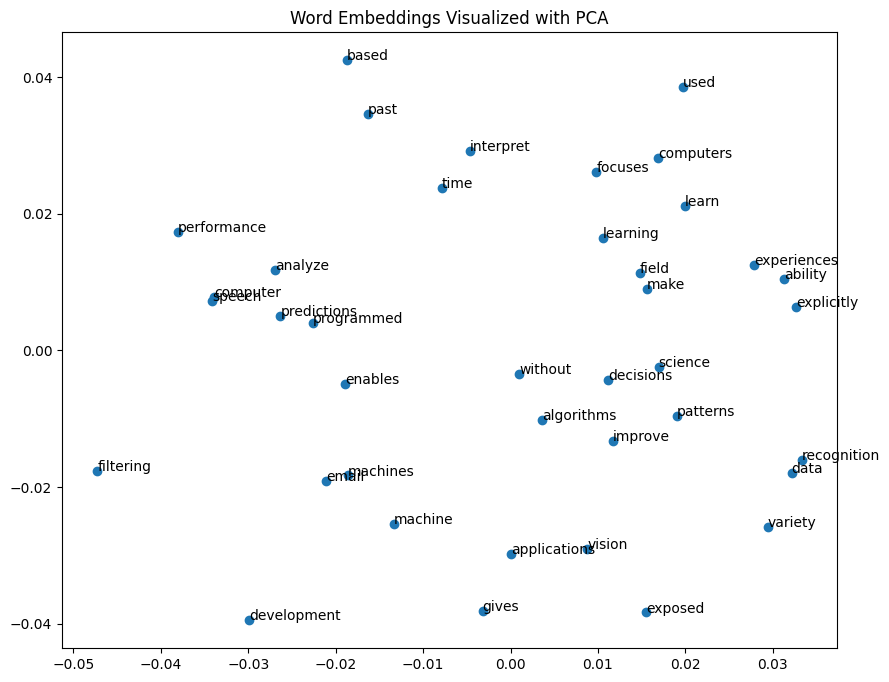

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])
words = model.wv.index_to_key

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Word Embeddings Visualized with PCA")
plt.show()